In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('train-2.csv')

In [116]:
df.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0


Here we will give a short explanation of all the columns in the dataframe:

id: Just a unique number for each person.

age: The age of the person.

hypertension: Whether they have high blood pressure (1) or not (0).

heart_disease: Whether they have heart disease (1) or not (0).

avg_glucose_level: Their average blood sugar level.

bmi: Their body mass index (a measure of body fat).

gender_Female/Male/Other: The gender they identify as.

ever_married_No/Yes: Whether they have ever been married or not.

work_type_Govt_job/Never_worked/Private/Self-employed/children: The type of work they do or have done.

Residence_type_Rural/Urban: Whether they live in a rural or urban area.

smoking_status_formerly smoked/never smoked/smokes: Their smoking habits.

stroke: Whether they've had a stroke (1) or not (0).

display data types and missing values in the datafram df

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

In the output above we can see that there are no missing values in the dataframe. However, when we look at the data types, there are a lot of collumns that have booleans as a value. (e.g. booleans can only have 2 values: True and False). In order to apply Machine Learning on this dataset, we have to transform these boolean values into numerical values (e.g. 1 = TRUE, 0 = FALSE). If we have transformed the dataframe into only numerical values, we can apply our EDA and ML models eventually.

In [118]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


Drop the ID column


In [119]:

# new_data = new_data.drop(['id'], axis=1)
# #display(new_data.head(5))
# new_data_nostroke = new_data[new_data['stroke'] == 0]
# noWorkStrokes = new_data_nostroke['work_type_Never_worked'].sum()
# display(noWorkStrokes)

# new_data_stroke = new_data[new_data['stroke'] == 1]
# display(new_data_stroke)


In [120]:
# continuous_cols = ['age', 'avg_glucose_level', 'bmi']
# binary_cols = ['hypertension', 'heart_disease', 'gender_Female', 'gender_Male', 'gender_Other',
#                'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
#                'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
#                'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked',
#                'smoking_status_smokes']

# # Boxplot for continuous variables
# for col in continuous_cols:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(data=[new_data[col], new_data_stroke[col]], palette='coolwarm')
#     plt.title(f"Comparison of {col} (All vs Stroke)")
#     plt.xticks([0, 1], ['All', 'Stroke'])
#     plt.ylabel(col)
#     plt.show()

# # Barplot for binary variables
# for col in binary_cols:
#     plt.figure(figsize=(8, 4))
#     sns.barplot(x=['All', 'Stroke'], y=[new_data[col].mean(), new_data_stroke[col].mean()], palette='coolwarm')
#     plt.title(f"Comparison of {col} (All vs Stroke)")
#     plt.ylabel(f'Mean {col}')
#     plt.show()

@todo explenation why we droped never worked strokes

Transform df into only numerical values.

In [121]:
df['age'] = df['age'].astype(int)


# df -> df numerical values


#df_numeric = df.astype(int)

# display 5 first rows of the transformed dataframe.
#df_numeric.head(5)
#df_numeric.describe()

df = df[df['gender_Other'] == 0]


df['gender'] = df.apply(
    lambda row: 0 if row['gender_Female'] else 1 ,
    axis=1
)
df = df.drop(['gender_Female', 'gender_Male', 'gender_Other'], axis=1)

df['ever_married'] = df.apply(
    lambda row: 1 if row['ever_married_Yes'] else 0,
    axis=1
)
df = df.drop(['ever_married_No', 'ever_married_Yes'], axis=1)

df['residence_type'] = df.apply(
    lambda row: 0 if row['Residence_type_Rural'] else 1,
    axis=1
)
df = df.drop(['Residence_type_Rural', 'Residence_type_Urban'], axis=1)

df['work_type_self_employed'] = df.apply(
    lambda row: 1 if row['work_type_Self-employed'] else 0,
   
    axis=1
)
df = df.drop(['work_type_Govt_job', 'work_type_Never_worked','work_type_Private','work_type_Self-employed', 'work_type_children'], axis=1)

display(df.head(5))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
0,52709,30,0,0,63.60,33.3,False,False,True,0,1,0,0,0
1,72295,75,1,0,215.17,48.0,False,True,False,0,0,1,0,1
2,26451,15,0,0,135.22,19.0,False,True,False,0,1,0,0,0
3,65210,47,0,0,64.89,28.2,False,True,False,0,1,1,1,1
4,69299,49,0,0,222.34,28.8,True,False,False,0,1,1,0,1


In [122]:
df_nostroke = df[df['stroke'] == 1]
df_nostroke.groupby(['gender']).mean()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,ever_married,residence_type,work_type_self_employed
gender,,,,,,,,,,,,,
0,36127.243986,68.725086,0.292096,0.164948,128.032371,29.653265,0.233677,0.515464,0.134021,1.0,0.890034,0.498282,0.319588
1,37807.818584,68.292035,0.261062,0.274336,131.281416,30.174336,0.318584,0.283186,0.221239,1.0,0.898230,0.526549,0.345133


REMOVING THE REDUNDANT/DUMMY COLUMNS
The columns are deleted because their information has been merged or transformed into new columns, which simplifies the dataset. This process eliminates redundancy and reduces the number of columns, which can make the data easier to work with and less prone to overfitting in machine learning models.

#### Gender: 
The gender_Female, gender_Male, and gender_Other columns are merged into a single gender column (0 for Female, 1 for Male). The original columns are now redundant.
#### Ever Married:
ever_married_Yes and ever_married_No are combined into a single ever_married column (1 for Yes, 0 for No), making the original columns unnecessary.
#### Residence Type:
The one-hot encoded columns for Residence_type_Rural and Residence_type_Urban are merged into residence_type (0 for Rural, 1 for Urban), so the originals are deleted.
#### Work Type:
The work_type_Self-employed column is simplified into work_type_self_employed (1 for Self-employed, 0 otherwise). The original work type columns are no longer needed.
While looking at the data , there are 5 collumns

While looking at the data , there are 5 collumns that have continuous numerical values like: 'age', 'hypertension', 'heart_disease', 'avg_glucose_level' and 'bmi'. 

The other columns are only true or false statement. 

In [123]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

In [124]:
display(df.head(5))


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
0,52709,30,0,0,63.60,33.3,0,0,1,0,1,0,0,0
1,72295,75,1,0,215.17,48.0,0,1,0,0,0,1,0,1
2,26451,15,0,0,135.22,19.0,0,1,0,0,1,0,0,0
3,65210,47,0,0,64.89,28.2,0,1,0,0,1,1,1,1
4,69299,49,0,0,222.34,28.8,1,0,0,0,1,1,0,1


# Data cleaning

We will now look at the data (the continuous values) to see if all the data is logical and consistent

In [125]:
df_stroke = df[df['stroke'] == 1]
display(df_stroke)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
28,13491,80,0,0,259.63,31.7,0,0,1,1,1,1,0,0
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
231,43424,78,0,0,78.81,19.6,0,0,0,1,0,1,0,0
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
283,23260,67,0,0,89.59,25.3,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33244,50049,72,0,1,141.72,33.0,0,0,0,1,1,1,0,0
33284,5095,59,0,0,79.53,29.9,0,1,0,1,1,1,1,1
33315,4809,80,0,0,109.96,19.9,0,1,0,1,0,1,0,0
33328,39373,82,1,0,196.92,22.2,0,1,0,1,0,1,1,1


### Next we will plot all columns and display boxplots for continuos values and barplots for binary values to inspect the data more closely.

In [126]:
df_nostroke = df[df['stroke'] == 1] 
stroke_count_by_gender = df_nostroke.groupby('gender').size()
display(stroke_count_by_gender)

gender
0    291
1    226
dtype: int64

@TODO explanation why formerly smoked has a higer risk according to the data for a stroke? is it true.

Drop unnecessary columns @todo

In [127]:
columns_to_drop = [
    
    'gender',
    'smoking_status_never smoked', 
    'smoking_status_smokes'
]


df = df.drop(columns=columns_to_drop)



print(df.head())

      id  age  hypertension  heart_disease  avg_glucose_level   bmi  \
0  52709   30             0              0              63.60  33.3   
1  72295   75             1              0             215.17  48.0   
2  26451   15             0              0             135.22  19.0   
3  65210   47             0              0              64.89  28.2   
4  69299   49             0              0             222.34  28.8   

   smoking_status_formerly smoked  stroke  ever_married  residence_type  \
0                               0       0             0               0   
1                               0       0             1               0   
2                               0       0             0               0   
3                               0       0             1               1   
4                               1       0             1               0   

   work_type_self_employed  
0                        0  
1                        1  
2                        0  
3     

In [128]:
df_nostroke = df[df['stroke'] == 0]

There are a lot of outliers in the columns bmi & avg_glucose_levels. 
According to general medical knowlege. An assumption we could make is that people with an high BMI, average glucose level get more strokes.

To test this theory, we will find out how many people had a stroke in total, how many people with a high BMI got a stroke and how many 
people with high BMI also got a stroke. 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
28,13491,80,0,0,259.63,31.7,0,0,1,1,1,1,0,0
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
231,43424,78,0,0,78.81,19.6,0,0,0,1,0,1,0,0
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
283,23260,67,0,0,89.59,25.3,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33244,50049,72,0,1,141.72,33.0,0,0,0,1,1,1,0,0
33284,5095,59,0,0,79.53,29.9,0,1,0,1,1,1,1,1
33315,4809,80,0,0,109.96,19.9,0,1,0,1,0,1,0,0
33328,39373,82,1,0,196.92,22.2,0,1,0,1,0,1,1,1


median glucose level of stroke patients 104.12
median glucose level of all patients 91.32
Median age of all patients 43.0
median age of stroke patients 72.0


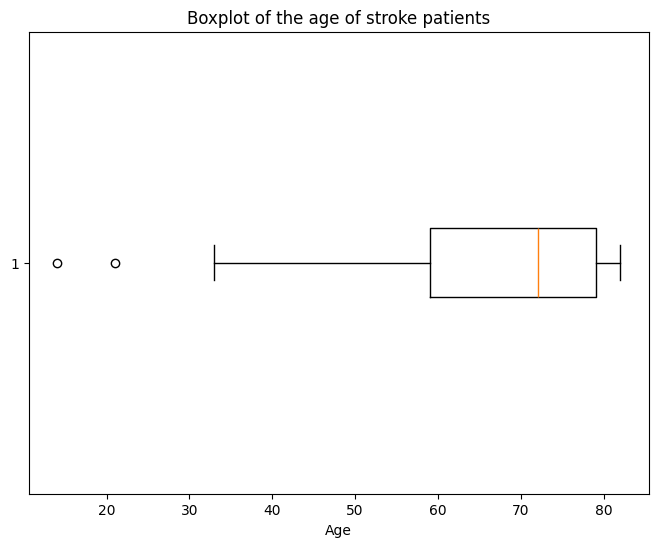

In [129]:
display(df_stroke)

print("median glucose level of stroke patients" + str(" ") + str(df_stroke['avg_glucose_level'].median()))
print("median glucose level of all patients" + str(" ") + str(df['avg_glucose_level'].median()))

print("Median age of all patients" + str(" ") + str(df['age'].median()))
print("median age of stroke patients" + str(" ") + str(df_stroke['age'].median()))


plt.figure(figsize=(8, 6))
plt.boxplot(df_stroke["age"], vert=False)
plt.title("Boxplot of the age of stroke patients")
plt.xlabel("Age")
plt.show()

median glucose level of stroke patients 104.12
median glucose level of all patients 91.32
Median age of all patients 43.0
median age of stroke patients 72.0

In [130]:
df_stroke_and_overweight = df_stroke[df_stroke['bmi'] >= 25]
display(df_stroke_and_overweight) 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
28,13491,80,0,0,259.63,31.7,0,0,1,1,1,1,0,0
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
283,23260,67,0,0,89.59,25.3,0,0,0,1,1,1,1,1
289,11961,57,1,0,196.30,38.6,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33147,20426,78,1,0,203.87,45.7,0,1,0,1,0,0,1,0
33202,20067,74,0,0,101.67,27.9,0,1,0,1,0,0,0,0
33244,50049,72,0,1,141.72,33.0,0,0,0,1,1,1,0,0
33284,5095,59,0,0,79.53,29.9,0,1,0,1,1,1,1,1


According to the WHO organization people with a bmi score over 25 are overweight. 
In the dataset there are 517 cases of people who had a stroke. 

When filtering the people who had a stroke and a bmi over 25, which means that they are overweight. We see that 414 people suffered from a stoke.
This strongly indicates that a majority of the patient who are overweight suffered a stroke. 

In conclusion this means that approx. 80% of overweight people also suffered from a stroke according to this dataset.

In [131]:
df_stroke_and_hypertension = df_stroke[df_stroke['hypertension'] == 1]
display(df_stroke_and_hypertension)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,gender,ever_married,residence_type,work_type_self_employed
216,3512,70,1,0,89.13,34.2,1,0,0,1,0,1,1,1
245,36338,39,1,0,58.09,39.2,0,0,1,1,0,1,0,0
289,11961,57,1,0,196.30,38.6,0,1,0,1,0,1,0,0
616,6660,67,1,0,88.79,27.4,1,0,0,1,1,1,1,1
783,2326,67,1,0,179.12,28.1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32941,53156,73,1,0,77.72,31.4,0,1,0,1,1,1,0,1
32947,36575,81,1,1,65.12,27.4,1,0,0,1,1,0,1,0
33137,34567,81,1,0,74.02,25.0,0,1,0,1,0,1,0,1
33147,20426,78,1,0,203.87,45.7,0,1,0,1,0,0,1,0


### We will apply some basic feature engineering. We will use our medical domain knowledge to create new collumns that tell our ML model which factors indicate a higher risk to have a stroke

For Example, if a patient is over 60 (please refer to our EDA boxplot), the chance to get a stroke is higher. 
but if a patient is over 60 and also has a disease like hypertention or a heart problem, the risk of a stroke can be elevated.
This is the reason why we make new columns that show the compounding effect of these combinations. 

In [132]:
# 1. Binary Age Feature (age > 60)
df['age_above_60'] = df['age'].apply(lambda x: 1 if x > 60 else 0)

# 2. Interaction Terms
# Age and Hypertension
df['age_above_60_hypertension'] = df['age_above_60'] * df['hypertension']

# Age and Heart Disease
df['age_above_60_heart_disease'] = df['age_above_60'] * df['heart_disease']

# Hypertension and Smoking (formerly smoked only)
df['hypertension_former_smoker'] = df['hypertension'] * df['smoking_status_formerly smoked']

# 3. BMI Categorization
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal'
    elif 24.9 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# 4. Average Glucose Level Binning
def categorize_glucose(avg_glucose_level):
    if avg_glucose_level < 140:
        return 'normal'
    elif 140 <= avg_glucose_level < 200:
        return 'prediabetic'
    else:
        return 'diabetic'

df['glucose_category'] = df['avg_glucose_level'].apply(categorize_glucose)


print(df[['age_above_60', 'age_above_60_hypertension', 'age_above_60_heart_disease', 'hypertension_former_smoker', 'bmi_category', 'glucose_category']].head())
display(df)


   age_above_60  age_above_60_hypertension  age_above_60_heart_disease  \
0             0                          0                           0   
1             1                          1                           0   
2             0                          0                           0   
3             0                          0                           0   
4             0                          0                           0   

   hypertension_former_smoker bmi_category glucose_category  
0                           0        obese           normal  
1                           0        obese         diabetic  
2                           0       normal           normal  
3                           0   overweight           normal  
4                           0   overweight         diabetic  


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,stroke,ever_married,residence_type,work_type_self_employed,age_above_60,age_above_60_hypertension,age_above_60_heart_disease,hypertension_former_smoker,bmi_category,glucose_category
0,52709,30,0,0,63.60,33.3,0,0,0,0,0,0,0,0,0,obese,normal
1,72295,75,1,0,215.17,48.0,0,0,1,0,1,1,1,0,0,obese,diabetic
2,26451,15,0,0,135.22,19.0,0,0,0,0,0,0,0,0,0,normal,normal
3,65210,47,0,0,64.89,28.2,0,0,1,1,1,0,0,0,0,overweight,normal
4,69299,49,0,0,222.34,28.8,1,0,1,0,1,0,0,0,0,overweight,diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9,0,0,109.80,14.5,0,0,0,0,0,0,0,0,0,underweight,normal
33546,19648,47,0,0,88.61,30.8,0,0,1,1,0,0,0,0,0,obese,normal
33547,35550,3,0,0,89.68,16.2,0,0,0,0,0,0,0,0,0,underweight,normal
33548,65453,56,1,0,82.44,27.8,0,0,1,1,0,0,0,0,0,overweight,normal


In [133]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
glucose_mapping = {
    'normal': 0,
    'prediabetic': 1,
    'diabetic': 2
}

df['glucose_category_encoded'] = df['glucose_category'].map(glucose_mapping)

bmi_mapping = {
    'underweight': 0,
    'normal': 1,
    'overweight': 2,
    'obese': 3
}

df['bmi_category_encoded'] = df['bmi_category'].map(bmi_mapping)

df.drop(['bmi_category', 'glucose_category'], axis=1, inplace=True)


In [134]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


X = df.drop(columns=['stroke']) 
y = df['stroke']  

# Random Undersampling for balance
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

# cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='f1')


y_pred = clf.predict(X_test)

# confusion matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.73      0.71       102
           1       0.73      0.70      0.71       105

    accuracy                           0.71       207
   macro avg       0.72      0.72      0.71       207
weighted avg       0.72      0.71      0.71       207



In [135]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score



# Random Undersampling for balance
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Train your DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 3: Load the new test data
new_data = pd.read_csv('test.csv')  # Replace with your new test data file


# PREPROCESSING
new_data['age'] = new_data['age'].astype(int)

new_data = new_data[new_data['gender_Other'] == 0]


new_data['gender'] = new_data.apply(
    lambda row: 0 if row['gender_Female'] else 1 ,
    axis=1
)
new_data = new_data.drop(['gender_Female', 'gender_Male', 'gender_Other'], axis=1)

new_data['ever_married'] = new_data.apply(
    lambda row: 1 if row['ever_married_Yes'] else 0,
    axis=1
)
new_data = new_data.drop(['ever_married_No', 'ever_married_Yes'], axis=1)

new_data['residence_type'] = new_data.apply(
    lambda row: 0 if row['Residence_type_Rural'] else 1,
    axis=1
)
new_data = new_data.drop(['Residence_type_Rural', 'Residence_type_Urban'], axis=1)

new_data['work_type_self_employed'] = new_data.apply(
    lambda row: 1 if row['work_type_Self-employed'] else 0,
   
    axis=1
)
new_data = new_data.drop(['work_type_Govt_job', 'work_type_Never_worked','work_type_Private','work_type_Self-employed', 'work_type_children'], axis=1)


new_data[new_data.select_dtypes(include='bool').columns] = new_data.select_dtypes(include='bool').astype(int)

new_data_nostroke = new_data
stroke_count_by_gender = new_data_nostroke.groupby('gender').size()
columns_to_drop = [
    'gender',
    'smoking_status_never smoked', 
    'smoking_status_smokes'
]


new_data = new_data.drop(columns=columns_to_drop)

new_data_nostroke = new_data

# 1. Binary Age Feature (age > 60)
new_data['age_above_60'] = new_data['age'].apply(lambda x: 1 if x > 60 else 0)

# 2. Interaction Terms
# Age and Hypertension
new_data['age_above_60_hypertension'] = new_data['age_above_60'] * new_data['hypertension']

# Age and Heart Disease
new_data['age_above_60_heart_disease'] = new_data['age_above_60'] * new_data['heart_disease']

# Hypertension and Smoking (formerly smoked only)
new_data['hypertension_former_smoker'] = new_data['hypertension'] * new_data['smoking_status_formerly smoked']

# 3. BMI Categorization
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal'
    elif 24.9 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

new_data['bmi_category'] = new_data['bmi'].apply(categorize_bmi)

# 4. Average Glucose Level Binning
def categorize_glucose(avg_glucose_level):
    if avg_glucose_level < 140:
        return 'normal'
    elif 140 <= avg_glucose_level < 200:
        return 'prediabetic'
    else:
        return 'diabetic'

new_data['glucose_category'] = new_data['avg_glucose_level'].apply(categorize_glucose)
glucose_mapping = {
    'normal': 0,
    'prediabetic': 1,
    'diabetic': 2
}

new_data['glucose_category_encoded'] = new_data['glucose_category'].map(glucose_mapping)

bmi_mapping = {
    'underweight': 0,
    'normal': 1,
    'overweight': 2,
    'obese': 3
}

new_data['bmi_category_encoded'] = new_data['bmi_category'].map(bmi_mapping)

new_data.drop(['bmi_category', 'glucose_category'], axis=1, inplace=True)

X_new = new_data

# Ensure the new data has the same features as the training data
X_new = X_new.reindex(columns=X.columns, fill_value=0)  # Fill missing columns with 0s

# Step 4: Make predictions
y_new_pred = clf.predict(X_new)

# Optional: If the true labels are available in the new test data
if 'stroke' in new_data.columns:
    y_true = new_data['stroke']
    print(classification_report(y_true, y_new_pred))

# Output predictions
print("Predictions on the new test data:", y_new_pred)


Predictions on the new test data: [0 0 0 ... 0 0 1]


In [136]:
import joblib

# Save the model
joblib.dump(clf, 'decision_tree_model.pkl')

# Load the model later when needed
loaded_model = joblib.load('decision_tree_model.pkl')


In [138]:

# Make predictions using the preprocessed new data
predictions = loaded_model.predict(new_data)

# Display the predictions
print("Predictions on the new data:")

#  # Save predictions to a CSV file
output_df = pd.DataFrame(predictions, columns=['Predicted_Target'])
# output_df.to_csv('predictions.csv', index=False)
display(output_df)
display(new_data)
display(output_df)


Predictions on the new data:


,Predicted_Target
0,0
1,0
2,0
3,0
4,0
...,...
8382,0
8383,0
8384,0
8385,0


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,ever_married,residence_type,work_type_self_employed,age_above_60,age_above_60_hypertension,age_above_60_heart_disease,hypertension_former_smoker,glucose_category_encoded,bmi_category_encoded
0,32840,52,0,0,97.32,21.8,0,1,1,0,0,0,0,0,0,1
1,45158,30,0,0,227.99,47.7,0,1,1,0,0,0,0,0,2,3
2,56105,26,0,0,113.28,24.4,0,1,1,0,0,0,0,0,0,1
3,3112,24,0,0,79.15,21.0,1,1,1,0,0,0,0,0,0,1
4,35224,63,0,0,89.69,33.3,0,1,1,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,60672,24,0,0,77.54,25.0,0,0,0,0,0,0,0,0,0,2
8384,25989,17,0,0,99.99,22.7,0,0,0,1,0,0,0,0,0,1
8385,34072,11,0,0,80.11,22.2,0,0,1,0,0,0,0,0,0,1
8386,32400,16,0,0,105.26,47.5,0,0,0,0,0,0,0,0,0,3


,Predicted_Target
0,0
1,0
2,0
3,0
4,0
...,...
8382,0
8383,0
8384,0
8385,0
